# US15 - Previsão do custo mensal de água para um novo parque de 55 hectares

# Introdução 

A US15 tem como objetivo a previsão do custo médio mensal de água para um novo parque de 55 hectares. Para isso foi observado que o custo associado com o consumo de água de cada parque está relacionado com o seu tamanho, e então, foi registado o consumo de água diário de vários parques de diferentes tamanhos e depois aplicado modelo de regressão linear considerando a área do parque como a variável independente e o custo médio mensal de água como a variável de resposta.

O resultado desta US inclui o gráfico de dispersão associado aos dados, a reta de regressãr e a previsão do custo de água para o novo parque.

**Fórmulas e metodos utilizados:**

<u>Coeficiente de correlação amostral de Pearson e coeficiente de determinação</u><br>
O coeficiente de correlação amostral de Pearson, r, é uma medida da direção e grau com que duas variáveis, se associam linearmente.<br>
$$
r = \frac{S_{xy}}{ \sqrt{ S_{xx} \times S_{yy} } }, \hspace{1cm} -1 \le r \le 1
$$
$$
S_{xx} = \sum_{i=1}^{n} (x_i - \overline{x})^2, \hspace{5mm} S_{yy} = \sum_{i=1}^{n} (y_i - \overline{y})^2, \hspace{5mm} S_{xy} = \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})
$$
$$
x_1 \text{, ..., } x_n \text{ e } y_1 \text{, ..., } y_n \text{ são os valores observados de cada uma das variáveis.}
$$
$$
\overline{x} \text{ e } \overline{y} \text{ são as médias dos valores } x_1 \text{, ..., } x_n \text{ e } y_1 \text{, ..., } y_n \text{ respetivamente.}
$$
$$
\text{O coeficiente de determinação é dado por } r^2 \space (0 \le r^2 \le 1) \text{.}
$$

<br>
<u>Regressão linear simples</u><br>
A regressão linear simples é uma metodologia estatística em que a relação entre a variável de resposta (variável dependente) e a variável independente é representada por uma reta, e é usada para prever o comportamento da variável de resposta a partir do conhecimento da variável independente.
<br>
A relação entre a variável de resposta e a variável independente é probabilística porque a relação não é exata, ou seja, o valor y da variável (aleatória) de resposta Y não é unicamente determinado quando o valor da variável independente x é especificado.
<br><br>

<u>Modelo de regressão linear simples</u><br>
Para introduzir a incerteza no resultado previsto, devemos aplicar um modelo matemático probabilístico.
No modelo probabilístico, dizemos que a média ou valor esperado de Y para um dado valor de x, representado por E(Y|x), tem como gráfico uma reta, ou seja:
$$
E(Y|x) = \beta_0 + \beta_1x
$$
Para cada valor de x, o valor da variável aleatória Y varia aleatoriamente em torno da média E(Y|x). $\beta_0$ e $\beta_1$ são os coeficientes de regressão.

# Código e resultados

Sxx = 3937.940; Syy = 5041248.620; Sxy = 133342.285
A reta de regressão é y = 71.816 + 33.861x



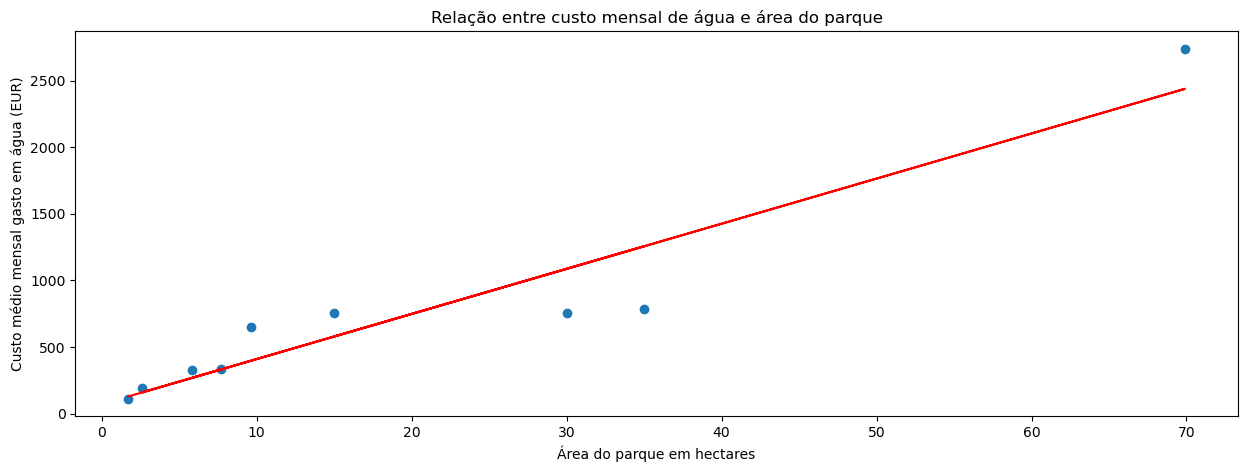


PREVISÃO DO CUSTO DE MÉDIO MENSAL DE ÁGUA

Área do parque: 55.0 hectares
Custo médio previsto: 1934.166 EUR


In [1]:
import pandas as pd
import statistics as st
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import sys


WATER_COST = 0.7
WATER_EXTRA_FEE_FROM = 1000
WATER_EXTRA_FEE_VALUE = 1.15

NEW_PARK_AREA = 55.0


dataframe = pd.read_csv('water_consumption_updated.csv', sep=';', decimal=',')
areas_dataframe = pd.read_csv('Area.csv', sep=';', decimal=',')


# Extract park => area
# ==================================================
park_areas = {}
for index, row in areas_dataframe.iterrows():
    park_areas[ row['Park'] ] = row['Area']


# Extract park => average monthly cost of water
# consumption
# ==================================================
park_avg_monthly_consumption = {}
for parkid in park_areas.keys():
    park_dataframe = dataframe[dataframe['Park'] == parkid]

    # Get monthly water comsuption (m3)
    monthly_comsuption = {}
    for i, row in park_dataframe.iterrows():
        year_month = str(row['Year']) + '/' + str(row['Month'])
        if year_month not in monthly_comsuption:
            monthly_comsuption[year_month] = 0.0
        monthly_comsuption[year_month] += float(row['Consumption'])

    # Calc monthly water costs from water comsuption
    monthly_costs = {}
    for year_month, comsuption_m3 in monthly_comsuption.items():
        if comsuption_m3 > WATER_EXTRA_FEE_FROM:
            extra_cost = comsuption_m3 - WATER_EXTRA_FEE_FROM
            extra_cost = extra_cost * WATER_COST
            extra_cost = extra_cost * WATER_EXTRA_FEE_VALUE
            monthly_costs[year_month] = (WATER_EXTRA_FEE_FROM * WATER_COST) + extra_cost
        else:
            monthly_costs[year_month] = comsuption_m3 * WATER_COST

    park_avg_monthly_consumption[parkid] = st.mean(monthly_costs.values())


# Calc Sxx, Syy, Sxy, regression line eq., sqe
# ==================================================
values_x = list(park_areas.values())
values_y = list(park_avg_monthly_consumption.values())
mean_x = np.mean( values_x )
mean_y = np.mean( values_y )

Sxx = 0.0
for x in values_x:
    Sxx += (x - mean_x) ** 2

Syy = 0.0
for y in values_y:
    Syy += (y - mean_y) ** 2

Sxy = 0.0
for i in range(len( values_x )):
    Sxy += (values_x[i] - mean_x) * (values_y[i] - mean_y)
    
print(f'Sxx = {Sxx:.3f}; Syy = {Syy:.3f}; Sxy = {Sxy:.3f}')

beta1 = Sxy / Sxx
beta0 = mean_y - beta1 * mean_x
print(f'A reta de regressão é y = {beta0:.3f} + {beta1:.3f}x')

print()


# Draw scatter diagram
# ==================================================
chart_x = []
chart_y = []
for parkid in park_areas.keys():
    chart_x.append( park_areas[parkid] )
    chart_y.append( park_avg_monthly_consumption[parkid] )

linregress = stats.linregress(chart_x, chart_y)
chartdf = pd.DataFrame({'x':chart_x, 'y':chart_y})

plt.figure(figsize=(15, 5))
plt.plot(chartdf.x, chartdf.y, 'o')
plt.plot(chartdf.x, linregress.intercept + linregress.slope * chartdf.x, 'r')
plt.xlabel('Área do parque em hectares')
plt.ylabel('Custo médio mensal gasto em água (EUR)')
plt.title('Relação entre custo mensal de água e área do parque')
plt.show()
print()


# Predict average water consumption monthly costs for
# the new park
# ==================================================
print('PREVISÃO DO CUSTO DE MÉDIO MENSAL DE ÁGUA')
print()
print(f'Área do parque: {NEW_PARK_AREA} hectares')

perdicted_cost = beta0 + beta1 * NEW_PARK_AREA
print(f'Custo médio previsto: {perdicted_cost:.3f} EUR')


# Análise de dados

Através da análise realizada, foi possível prever o custo médio mensal gasto em água para um novo parque de 55 hectares utilizando um modelo de regressão linear simples. Os dados analisados, apresentados num gráfico de dispersão, mostraram uma correlação positiva entre a área dos parques e o custo médio mensal gasto em água, evidenciando que parques maiores tendem a apresentar custos mais elevados. Com base no modelo de regressão linear desenvolvido, estimou-se que o novo parque com 55 hectares de área terá um custo médio mensal de 1934.166 euros. Estes resultados podem ajudar no planejamento financeiro e na gestão de recursos hídricos para o novo parque.

# Conclusão

A análise realizada evidencia a utilidade da regressão linear como uma ferramenta eficaz para fazer previsões em diversos contextos. Ao estabelecer uma relação entre variáveis, o modelo de regressão linear simples permite prever valores futuros com base em dados históricos. Essa abordagem é especialmente valiosa para o planejamento e tomada de decisões, fornecendo estimativas confiáveis.

# US16 - Análise do tempo de execução de algoritmo usando regressão polinomial 

# Introdução 

A análise de desempenho de algoritmos é fundamental para entender e otimizar o funcionamento de sistemas computacionais. Um dos aspectos cruciais dessa análise é o tempo de execução de algoritmos, que muitas vezes está relacionado com o tamanho dos conjuntos de dados de entrada.

Neste contexto, a regressão polinomial surge como uma ferramenta importante para modelar a relação entre o tamanho dos conjuntos de dados e o tempo de execução dos algoritmos. A regressão polinomial permite capturar padrões não lineares nos dados, o que pode ser crucial quando se trata de prever o desempenho do algoritmo em conjuntos de dados variáveis.

A US16 está relacionada à análise do comportamento do tempo de execução de um algoritmo, especificamente do algoritmo descrito na US13, sendo o objetivo principal a determinação da relação entre o tamanho da entrada do algoritmo (size - número de arestas) e o tempo de execução (time - segundos), utilizando técnicas de regressão polinomial. Assim, são identificados padrões no tempo de execução do algoritmo à medida que o tamanho da entrada varia, o que permite entender o desempenho do algoritmo em diferentes cenários e prever o seu comportamento para entrada de dados maiores.

Nesta US, os dados e resultados associados à US14 são utilizados como base para a análise - tempo de execução do algoritmo para diferentes tamanhos de conjuntos de dados. A técnica utilizada é a regressão polinomial, que consiste em ajustar uma curva polinomial aos dados de entrada e tempo de execução, com o objetivo de encontrar a melhor aproximação para a relação entre essas variáveis. 

Os dados de entrada são pares de valores (tamanho da entrada e tempo de execução), onde o tamanho da entrada é representado pelo número de arestas e o tempo de execução é medido em uma unidade de tempo específica, neste caso milissegundos.

O resultado desta US inclui o gráfico de dispersão associado aos dados, com a curva de regressão polinomial que melhor se ajusta aos dados, juntamente com o coeficiente de determinação. Este gráfico permite uma compreensão intuitiva do comportamento do tempo de execução do algoritmo à medida que o tamanho da entrada aumenta.

Para tal, utilizaremos a linguagem de programação Python, juntamente com a biblioteca Pandas para manipulação de dados, a biblioteca Scikit-learn para implementação da regressão polinomial e a biblioteca Matplotlib para visualização dos resultados.

**Fórmulas utilizadas**:

<u>Coeficiente de correlação amostral de Pearson</u><br>
$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2 \sum_{i=1}^n (y_i - \bar{y})^2}},  -1 \leq r \leq 1
$$
$$
\text{r} - \text{Coeficiente de correlação amostral de Pearson}
$$
$$
n - \text{Número de dados}
$$
$$
x_i - \text{Valor x observado}
$$
$$
y_i - \text{Valor Y observado}
$$
$$
\bar{x} - \text{Média dos valores x}
$$
$$
\bar{y} - \text{Média dos valores y}
$$


<u>Média aritmética (Dados não classificados)</u><br>
$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
<u>Coeficiente de determinação</u><br>
$$
r^2, 0 \leq r \leq 1
$$
    
<u>Método do mínimos quadrados</u><br>
$$
sqe = \sum_{i=1}^{n} ê^2_i
$$
$$
\text{sqe} - \text{Soma dos Quadrados dos Erros}
$$
$$
n - \text{Número de dados}
$$
$$
ê_i - \text{Erro de ajuste para o i-ésimo dado}
$$

<u>Erros de Ajuste</u><br>
$$
ê_i = y_i - \hat{y}_i
$$
$$
\text{ê_i} - \text{Erro de ajuste - distância vertical das observações y_i à reta de regressão}
$$
$$
y_i - \text{Valor real}
$$
$$
\hat{y}_i - \text{Valor aproximado na reta da regressão}
$$

<u>Regressão polinomial</u><br>
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_m x^m + \epsilon
$$
$$
y - \text{Variável dependente}
$$
$$
x - \text{Variável independente}
$$
$$
\beta_0 - \text{Constante da equação de regressão polinomial}
$$
$$
\beta_i - \text{Coeficiente de regressão associado a x^i (para i = 1, 2, ..., m)}
$$
$$
\epsilon - \text{Erro ou resíduo, ou seja, a diferença entre o valor observado e o valor estimado pelo modelo.}
$$
 

# Código

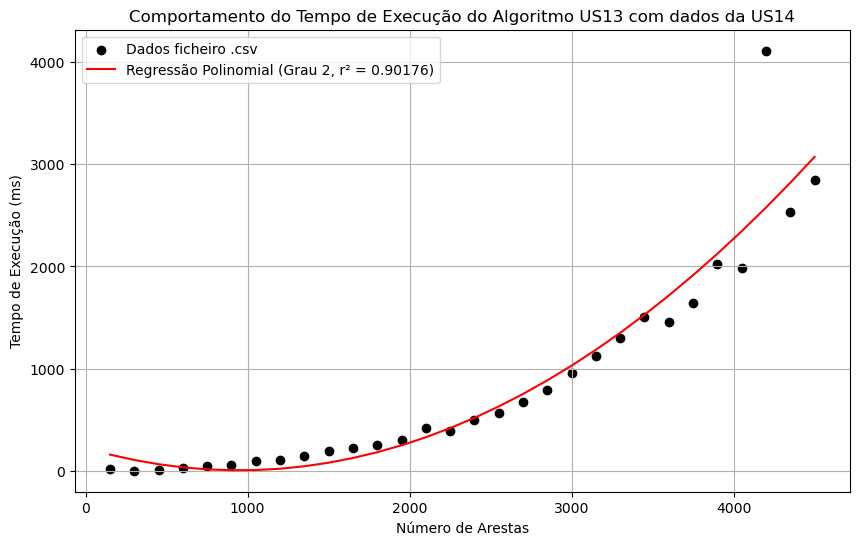

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Ler os dados do arquivo CSV, ignorando a primeira linha e especificando os nomes das colunas
column_names = ['size', 'time']
data = pd.read_csv("results.csv", delimiter=";", skiprows=1, names=column_names, dtype={'time': str})

# Substituir vírgulas por pontos e converter para float
data['time'] = data['time'].str.replace(',', '.').astype(float)


# Preparar os dados
X = data['size'].values.reshape(-1, 1)
y = data['time'].values


# Ajuste do modelo de regressão polinomial de grau 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Calcular o coeficiente de determinação (R²) para os modelos

r2_poly = r2_score(y, y_pred_poly)


# Plot os dados e os ajustes dos modelos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Dados ficheiro .csv')
plt.plot(X, y_pred_poly, color='red', label=f'Regressão Polinomial (Grau 2, r² = {r2_poly:.5f})')
plt.xlabel('Número de Arestas')
plt.ylabel('Tempo de Execução (ms)')  
plt.title('Comportamento do Tempo de Execução do Algoritmo US13 com dados da US14')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

# Análise dos Dados

Os dados fornecidos estão contidos no ficheiro results.csv e consistem em duas colunas principais: "size" que é o número de arestas e "time" que é o número de milissegundos para o conjunto de dados correspondente.

Estes dados são utilizados para a construção de um gráfico de dispersão. Posteriormente é ajustada uma curva de regressão polinomial de segundo grau aos dados para modelar essa relação de forma mais precisa, através do método dos mínimos quadrados.
Este método é usado para encontrar a curva que melhor se ajusta aos dados, minimizando a soma dos quadrados das diferenças entre os valores reais e os valores previstos pelo modelo. 

Ao analisar o gráfico de dispersão e a curva de regressão polinomial ajustada, verificamos, através do coeficiente de determinação (r²), usado para determinar o ajuste da curva de dados, que o valor é 0.90176. Isso indica que temos um ajuste bastante sólido, onde a maioria dos valores está próxima da curva de regressão. No gráfico, observa-se que alguns valores têm ligeiros desvios da curva formada, o que contribui para o coeficiente de determinação estar muito próximo de 1.

O gráfico e a curva de ajuste de regressão polinomial demonstram que o tempo de execução do algoritmo US13 aumenta de forma não linear à medida que a quantidade de dados da US14 aumenta. A regressão polinomial de segundo grau fornece um ajuste melhor aos dados do que a regressão linear, sugerindo que a relação entre o tempo de execução e a quantidade de dados é mais complexa do que uma relação linear simples

# Conclusão

A análise dos dados permite observar que o tempo de execução do algoritmo tende a aumentar à medida que o número de arestas nos conjuntos de dados aumenta. Isso sugere uma relação significativa entre a complexidade do problema e o tempo de processamento necessário para sua resolução.

Através da curva de regressão polinomial ajustada, identificamos padrões de comportamento nos dados - tempo de execução aumenta de forma linear, quadrática ou exponencial com o aumento do número de vértices -padrões essenciais para entender a escalabilidade do algoritmo e prever seu desempenho em conjuntos de dados maiores.

O ajuste da curva de regressão polinomial aos dados foi avaliada usando métricas como o coeficiente de determinação (r²) e, sendo um valor próximo de 1, indica um bom ajuste da curva aos dados. 

Assim, podemos desta análise concluir que a regressão polinomial permite retirar ilações práticas para o desenvolvimento e otimização de algoritmos, ou seja, se observarmos um aumento significativo no tempo de execução à medida que o número de arestas aumenta, pode ser necessária a implementação de estratégias de otimização para lidar com conjuntos de dados maiores de forma mais eficiente. 